In [1]:
from pylab import *
import matplotlib.pyplot as plt
rcParams['figure.figsize']=(12,3) 

In [2]:
from HH_functions import HH

In [3]:
def Iproto(t):
    return amp*(t>T1)*(t<T2)

In [4]:
import numpy as np
import math

def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

def HH(Iproto,T0):
    dt = 0.01;
    T  = math.ceil(T0/dt)  # [ms]
    gNa0 = 120   # [mS/cm^2]
    ENa  = 115;  # [mV]
    gK0  = 36;   # [mS/cm^2]
    EK   = -12;  # [mV]
    gL0  = 0.3;  # [mS/cm^2]
    EL   = 10.6; # [mV]

    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    for i in range(0,T-1):
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + Iproto(t[i]));
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);
    return V,m,h,n,t


In [55]:
T1,T2 = 100,250
stim = np.arange(-10,100,5)
dur = T2-T1
T0 = 500
current_values = []
spike_counts = []

for x in range(len(stim)):
    amp = stim[x]
    [V,m,h,n,t]=HH(Iproto,T0)
    current_trace = np.stack([t,Iproto(t)])
    #np.savetxt(f'current_trace_{amp}.txt',current_trace)
    variables = np.stack([V,m,n,h])[...,0]
    #np.savetxt(f'Stim_current_{amp}.txt',variables)
    # to get spike counts
    V_binned = []
    sp_count = 0
    for i in range(500):
        V_binned.append(max(V[100*i:100*(i+1)]))
        if V_binned[i] >= -30:
            sp_count = sp_count + 1
    current_values.append(amp)
    spike_counts.append(sp_count)


In [54]:
# to get spike counts
V_binned = []
sp_count = 0
for i in range(500):
    V_binned.append(max(V[100*i:100*(i+1)]))
    if V_binned[i] >= -30:
        sp_count = sp_count + 1
len(V_binned)
spike_counts

[49]

500

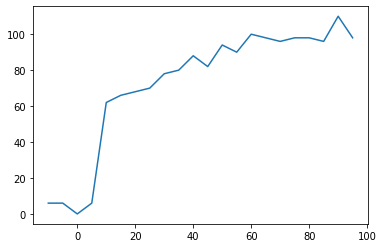

In [67]:
freq = np.multiply(spike_counts,2)
plt.plot(current_values,freq)